In [3]:
import sys
sys.path.append('src/utils')

In [4]:
import preprocessing as prep
import glicko as glk
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = prep.load_data()
df = prep.get_target(df)

Successfully concatenated 57 files.
Combined DataFrame shape: (194996, 49)
  tourney_id tourney_name surface  draw_size tourney_level  tourney_date  \
0  1968-2029       Dublin   Grass       32.0             A      19680708   
1  1968-2029       Dublin   Grass       32.0             A      19680708   
2  1968-2029       Dublin   Grass       32.0             A      19680708   
3  1968-2029       Dublin   Grass       32.0             A      19680708   
4  1968-2029       Dublin   Grass       32.0             A      19680708   

   match_num  winner_id  winner_seed winner_entry  ... l_1stIn l_1stWon  \
0        270     112411          NaN          NaN  ...     NaN      NaN   
1        271     126914          NaN          NaN  ...     NaN      NaN   
2        272     209523          NaN          NaN  ...     NaN      NaN   
3        273     100084          NaN          NaN  ...     NaN      NaN   
4        274     100132          NaN          NaN  ...     NaN      NaN   

   l_2ndWon l_SvG

In [6]:
df = glk.calculate_global_glicko_1(df)
df = glk.c_surface_glicko_1(df)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194996 entries, 0 to 194995
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   tourney_id                194996 non-null  object 
 1   tourney_name              194996 non-null  object 
 2   surface                   192006 non-null  object 
 3   tourney_level             194996 non-null  object 
 4   tourney_date              194996 non-null  int64  
 5   match_num                 194996 non-null  int64  
 6   player_A_id               194996 non-null  int64  
 7   player_A_seed             54502 non-null   float64
 8   player_A_entry            23218 non-null   object 
 9   player_A_name             194996 non-null  object 
 10  player_A_hand             194987 non-null  object 
 11  player_A_ht               172166 non-null  float64
 12  player_A_ioc              194955 non-null  object 
 13  player_A_age              192014 non-null  f

In [8]:
df_elo = df[['tourney_date', 'surface', 'player_A_id', 'player_A_name', 'player_B_id', 'player_B_name', 'A_Glicko1_Rating', 'B_Glicko1_Rating', 'A_Glicko1_Surface_Rating', 'B_Glicko1_Surface_Rating', 'target']]

In [9]:
df_elo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194996 entries, 0 to 194995
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   tourney_date              194996 non-null  int64  
 1   surface                   192006 non-null  object 
 2   player_A_id               194996 non-null  int64  
 3   player_A_name             194996 non-null  object 
 4   player_B_id               194996 non-null  int64  
 5   player_B_name             194996 non-null  object 
 6   A_Glicko1_Rating          194996 non-null  float64
 7   B_Glicko1_Rating          194996 non-null  float64
 8   A_Glicko1_Surface_Rating  192006 non-null  float64
 9   B_Glicko1_Surface_Rating  192006 non-null  float64
 10  target                    194996 non-null  int64  
dtypes: float64(4), int64(4), object(3)
memory usage: 16.4+ MB


In [10]:
df_elo['tourney_date'] = pd.to_datetime(df_elo['tourney_date'], format='%Y%m%d')
df_elo = df_elo[df_elo['tourney_date'] >= '2000-01-01']

C:\Users\AMON\AppData\Local\Temp\ipykernel_12668\970326194.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_elo['tourney_date'] = pd.to_datetime(df_elo['tourney_date'], format='%Y%m%d')


In [11]:
import matplotlib as mpl

plt.style.use("dark_background")
mpl.rcParams.update({
    "axes.facecolor": "#111111",
    "figure.facecolor": "#111111",
    "axes.edgecolor": "#CCCCCC",
    "axes.labelcolor": "#FFFFFF",
    "xtick.color": "#BBBBBB",
    "ytick.color": "#BBBBBB",
    "grid.color": "#FFFFFF",
    "text.color": "#FFFFFF",
    "legend.edgecolor": "#333333",
})

# --- Vibrant color palette ---
colors = plt.cm.tab10.colors + plt.cm.Set2.colors + plt.cm.Set3.colors

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Reuse your color helpers
_BASE_COLORS = list(plt.cm.tab10.colors) + list(plt.cm.Set2.colors) + list(plt.cm.Dark2.colors)
_PLAYER_COLOR_MAP = {}

def _get_player_color(name: str):
    if name not in _PLAYER_COLOR_MAP:
        _PLAYER_COLOR_MAP[name] = _BASE_COLORS[len(_PLAYER_COLOR_MAP) % len(_BASE_COLORS)]
    return _PLAYER_COLOR_MAP[name]

def plot_players_glicko1(
    df_elo: pd.DataFrame,
    K: int = 6,
    figsize=(10, 6),
    agg: str = "last",
    title: str = "Glicko-1 Evolution of Top Players",
    surface: str | None = None,
    min_matches: int = 30,
):
    plt.style.use("dark_background")
    mpl.rcParams.update({
        "axes.facecolor":"#111111","figure.facecolor":"#111111",
        "axes.edgecolor":"#CCCCCC","axes.labelcolor":"#FFFFFF",
        "xtick.color":"#BBBBBB","ytick.color":"#BBBBBB",
        "grid.color":"#FFFFFF","text.color":"#FFFFFF","legend.edgecolor":"#333333",
    })

    df = df_elo.copy()

    # Choose column set (overall vs surface) for Glicko-1
    use_surface = surface is not None and {"A_Glicko1_Surface_Rating","B_Glicko1_Surface_Rating"}.issubset(df.columns)
    a_col = "A_Glicko1_Surface_Rating" if use_surface else "A_Glicko1_Rating"
    b_col = "B_Glicko1_Surface_Rating" if use_surface else "B_Glicko1_Rating"

    # Optional surface filter (keeps rows for that surface only)
    if surface is not None and "surface" in df.columns:
        df = df[df["surface"] == surface].copy()

    # tourney_date may be int in yyyymmdd; coerce to datetime
    if not pd.api.types.is_datetime64_any_dtype(df["tourney_date"]):
        df["tourney_date"] = pd.to_datetime(df["tourney_date"].astype(str), format="%Y%m%d", errors="coerce")
    df = df.dropna(subset=["tourney_date"])

    # Build long format
    a = df[["tourney_date","player_A_id","player_A_name",a_col]].rename(
        columns={"player_A_id":"player_id","player_A_name":"player_name",a_col:"Rating"}
    )
    b = df[["tourney_date","player_B_id","player_B_name",b_col]].rename(
        columns={"player_B_id":"player_id","player_B_name":"player_name",b_col:"Rating"}
    )
    long = pd.concat([a, b], ignore_index=True)

    # Count matches to enforce threshold
    match_counts = (long.groupby(["player_id","player_name"])
                         .size()
                         .reset_index(name="matches"))

    # Aggregate by day per player
    if agg == "mean":
        per_day = long.groupby(["player_id","player_name","tourney_date"], as_index=False)["Rating"].mean()
    else:
        per_day = long.groupby(["player_id","player_name","tourney_date"], as_index=False)["Rating"].last()

    # Peak rating table and top-K selection
    career_peak = (
        per_day.groupby(["player_id","player_name"])["Rating"]
               .max()
               .reset_index(name="peak_rating")
               .merge(match_counts, on=["player_id","player_name"], how="left")
    )
    career_peak = career_peak[career_peak["matches"] >= min_matches] \
                           .sort_values("peak_rating", ascending=False)

    if career_peak.empty:
        raise ValueError("No players meet the minimum match threshold after filtering.")

    top = career_peak.head(K)
    top_names = set(top["player_name"])
    best_name = top.iloc[0]["player_name"]

    top_data = per_day[per_day["player_name"].isin(top_names)].sort_values(["player_name","tourney_date"])

    fig, ax = plt.subplots(figsize=figsize)
    for name, g in top_data.groupby("player_name"):
        color = _get_player_color(name)
        alpha = 1.0 if name == best_name else 0.3
        lw = 2 if name == best_name else 1.5
        ax.plot(g["tourney_date"], g["Rating"], label=name, color=color, linewidth=lw, alpha=alpha)

    suffix = f" — {surface}" if surface else ""
    ylabel = "Glicko-1 Rating (Surface)" if use_surface else "Glicko-1 Rating (Overall)"
    ax.set_title(f"{title}{suffix}", fontsize=14, weight="bold")
    ax.set_xlabel("Date", fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    ax.legend(title="Player", loc="upper left", facecolor="#1C1C1C", framealpha=0.8)
    ax.grid(True, linestyle="--", alpha=0.4)
    fig.tight_layout()
    plt.show()
    return fig, ax


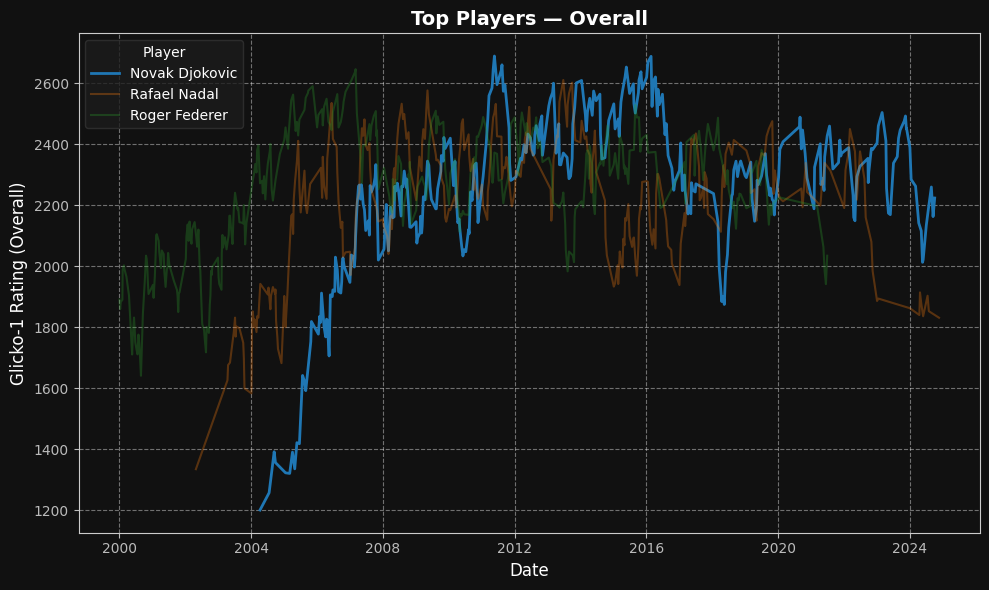

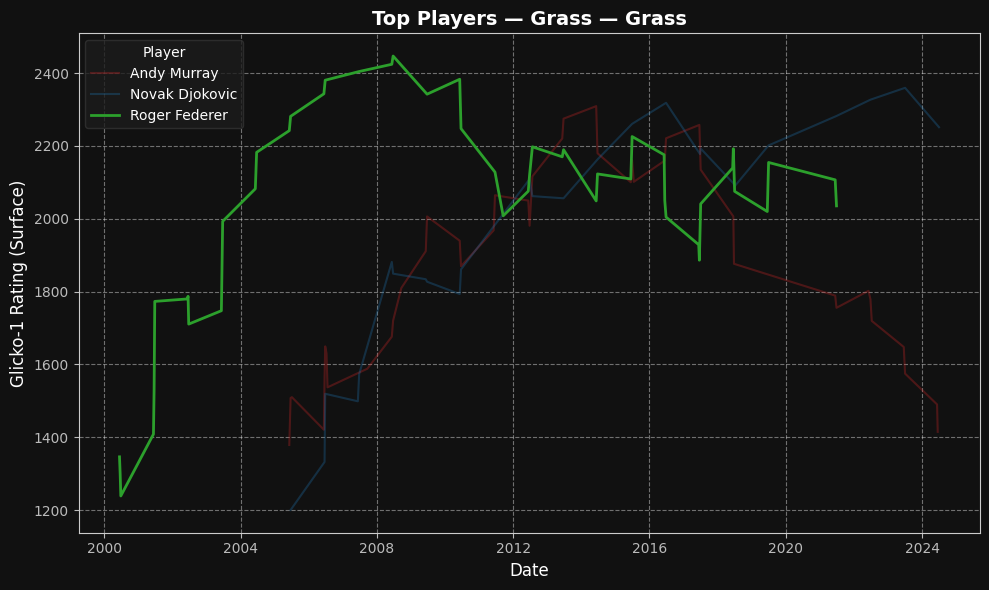

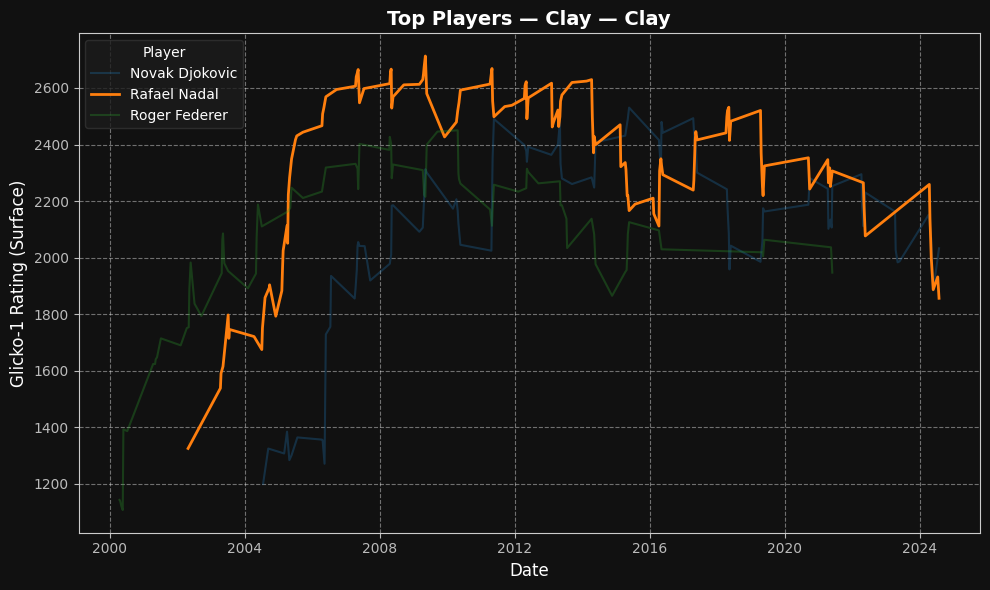

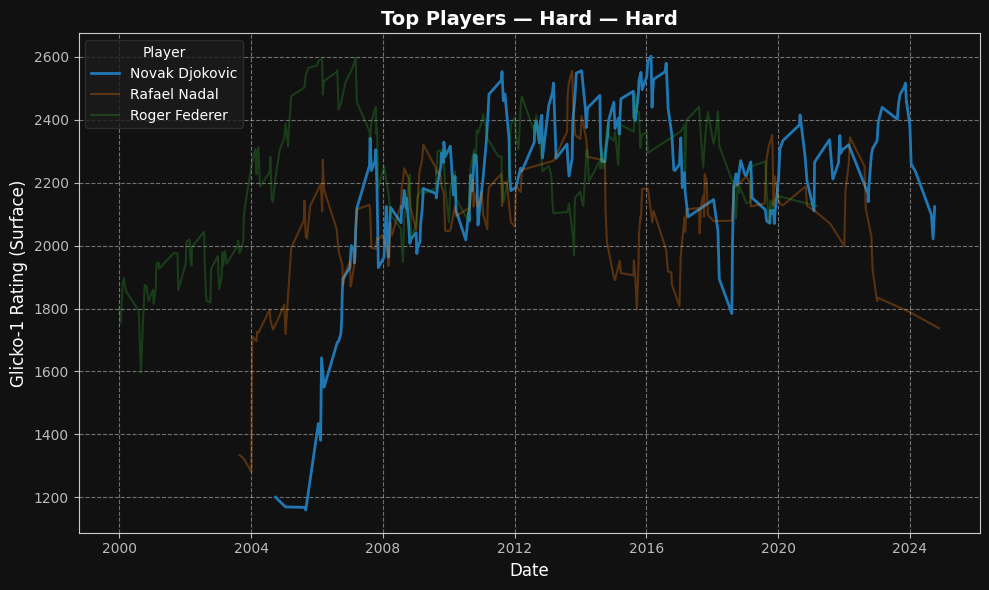

(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Top Players — Hard — Hard'}, xlabel='Date', ylabel='Glicko-1 Rating (Surface)'>)

In [13]:
plot_players_glicko1(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Overall", min_matches=50)
plot_players_glicko1(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Grass", surface="Grass", min_matches=40)
plot_players_glicko1(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Clay", surface="Clay", min_matches=40)
plot_players_glicko1(df_elo, K=3, figsize=(10,6), agg="last", title="Top Players — Hard", surface="Hard", min_matches=40)


In [14]:
### Baseline model for comparison purposes
### Should be a model based on simple Elo ratings only, we can have general and surface ELO and a logistic regression to predict match outcomes.
### We then can incorporate more features and see how much they improve over this baseline.

In [15]:
df_elo

,tourney_date,surface,player_A_id,player_A_name,player_B_id,player_B_name,A_Glicko1_Rating,B_Glicko1_Rating,A_Glicko1_Surface_Rating,B_Glicko1_Surface_Rating,target
120090,2000-01-03,Hard,103096,Arnaud Clement,102358,Thomas Enqvist,1624.046926,2010.318907,1639.492302,1958.443745,0
120091,2000-01-03,Hard,101543,Jeff Tarango,103017,Nicolas Kiefer,1808.712726,1971.327820,1392.209551,1891.796046,0
120092,2000-01-03,Hard,103420,Michal Tabara,102338,Yevgeny Kafelnikov,1565.965994,1961.286335,1200.000000,1835.693768,1
120093,2000-01-03,Hard,103819,Roger Federer,102533,Jens Knippschild,1863.575683,1669.913911,1762.968519,1587.460723,1
120094,2000-01-03,Hard,101750,Cristiano Caratti,102730,Ivo Heuberger,1466.239923,1470.019445,1404.491378,1369.185288,1
...,...,...,...,...,...,...,...,...,...,...,...
194991,2024-12-18,Hard,209950,Arthur Fils,210530,Learner Tien,1856.406916,1568.146648,1753.792212,1513.527835,0
194992,2024-12-18,Hard,209950,Arthur Fils,210150,Jakub Mensik,1780.187359,1716.651483,1679.962483,1665.288359,1
194993,2024-12-18,Hard,210506,Alex Michelsen,210530,Learner Tien,1828.744664,1692.271405,1791.205669,1628.441685,0
194994,2024-12-18,Hard,211663,Joao Fonseca,209414,Luca Van Assche,1833.023077,1478.632051,1710.514334,1522.443269,1


In [16]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

# ---------- Custom transformer to compute weighted Glicko-1 diff ----------
class WeightedGlickoDiff(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=0.5):
        self.alpha = alpha  # weight for overall; (1 - alpha) for surface

    def fit(self, X, y=None):
        return self

    def transform(self, X):
            # X is a DataFrame with the four Glicko-1 columns
            a = self.alpha
            a_w = a * X['A_Glicko1_Rating'].to_numpy() + (1 - a) * X['A_Glicko1_Surface_Rating'].to_numpy()
            b_w = a * X['B_Glicko1_Rating'].to_numpy() + (1 - a) * X['B_Glicko1_Surface_Rating'].to_numpy()
            glicko_diff = (a_w - b_w).reshape(-1, 1)
            return glicko_diff

# ---------- Prepare data (start from df_elo BEFORE any get_dummies) ----------
df_elo = df_elo.copy()
# handle int yyyymmdd safely
if not pd.api.types.is_datetime64_any_dtype(df_elo['tourney_date']):
    df_elo['tourney_date'] = pd.to_datetime(df_elo['tourney_date'].astype(str), format='%Y%m%d', errors='coerce')

# Keep only rows with required columns present
needed = [
    'A_Glicko1_Rating','A_Glicko1_Surface_Rating',
    'B_Glicko1_Rating','B_Glicko1_Surface_Rating',
    'surface','target'
]
df_elo = df_elo.dropna(subset=needed)

X = df_elo[['A_Glicko1_Rating','A_Glicko1_Surface_Rating','B_Glicko1_Rating','B_Glicko1_Surface_Rating','surface']]
y = df_elo['target']

# ---------- Build preprocessing: weighted Glicko diff + one-hot(surface) ----------
def select_glicko_cols(df):
    return df[['A_Glicko1_Rating','A_Glicko1_Surface_Rating','B_Glicko1_Rating','B_Glicko1_Surface_Rating']]

glicko_selector = FunctionTransformer(select_glicko_cols, validate=False)

preprocess = ColumnTransformer(
    transformers=[
        ('glicko_diff', Pipeline([
            ('select', glicko_selector),
            ('wg', WeightedGlickoDiff(alpha=0.5)),   # alpha will be tuned
        ]), X.columns.tolist()),  # ColumnTransformer needs a column list; inner selector uses its own
        ('surface', OneHotEncoder(drop='first', handle_unknown='ignore'), ['surface']),
    ],
    remainder='drop'
)

# ---------- Full model pipeline ----------
clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', LogisticRegression(max_iter=2000))
])

# ---------- Train/validation split ----------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# ---------- Hyperparameter search over alpha (and optionally C) ----------
param_grid = {
    'preprocess__glicko_diff__wg__alpha': np.linspace(0.0, 1.0, 21),
    # 'model__C': [0.25, 0.5, 1.0, 2.0, 4.0],
}

gs = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

gs.fit(X_train, y_train)

best_alpha = gs.best_params_['preprocess__glicko_diff__wg__alpha']
print(f"Best alpha (weight on Overall Glicko-1): {best_alpha:.3f}")
print(f"Best CV ROC AUC: {gs.best_score_:.4f}")

# ---------- Evaluate on test set ----------
best_model = gs.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

print("Test performance with tuned alpha and surface OHE (Glicko-1)")
print(f"Accuracy: {acc:.4f}")
print(f"Log Loss: {ll:.4f}")
print(f"ROC AUC: {auc:.4f}")

# ---------- Inspect feature names and coefficients ----------
ohe = best_model.named_steps['preprocess'].named_transformers_['surface']
surface_feature_names = ohe.get_feature_names_out(['surface'])
feature_names = np.r_[['glicko_diff'], surface_feature_names]

coefs = best_model.named_steps['model'].coef_.ravel()
intercept = best_model.named_steps['model'].intercept_[0]

print("Intercept:", f"{intercept:.6f}")
for name, coef in zip(feature_names, coefs):
    print(f"{name}: {coef:.6f}")


Best alpha (weight on Overall Glicko-1): 0.500
Best CV ROC AUC: 0.7298
Test performance with tuned alpha and surface OHE (Glicko-1)
Accuracy: 0.6599
Log Loss: 0.6153
ROC AUC: 0.7193
Intercept: 0.003533
glicko_diff: 0.003511
surface_Clay: 0.001113
surface_Grass: 0.013866
surface_Hard: -0.013551


c:\Users\AMON\Documents\GitHub\tennis\.venv\Lib\site-packages\sklearn\pipeline.py:61: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


In [17]:
import numpy as np
import pandas as pd

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss, roc_auc_score

# --- Single-feature transformer: weighted Glicko-1 difference ---
class WeightedGlickoDiff(BaseEstimator, TransformerMixin):
    def __init__(self, alpha=0.5):
        self.alpha = alpha  # weight on overall; (1 - alpha) on surface

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        a = self.alpha
        a_w = a * X['A_Glicko1_Rating'].to_numpy() + (1 - a) * X['A_Glicko1_Surface_Rating'].to_numpy()
        b_w = a * X['B_Glicko1_Rating'].to_numpy() + (1 - a) * X['B_Glicko1_Surface_Rating'].to_numpy()
        return (a_w - b_w).reshape(-1, 1)  # shape (n_samples, 1)

# --- Data prep (no OHE) ---
df = df_elo.copy()
if not pd.api.types.is_datetime64_any_dtype(df['tourney_date']):
    df['tourney_date'] = pd.to_datetime(df['tourney_date'].astype(str), format='%Y%m%d', errors='coerce')

# Fill missing surface ratings with overall ratings to keep rows
for side in ['A', 'B']:
    df[f'{side}_Glicko1_Surface_Rating'] = df[f'{side}_Glicko1_Surface_Rating'] \
        .fillna(df[f'{side}_Glicko1_Rating'])

needed = ['A_Glicko1_Rating','A_Glicko1_Surface_Rating','B_Glicko1_Rating','B_Glicko1_Surface_Rating','target']
df = df.dropna(subset=needed)

X = df[['A_Glicko1_Rating','A_Glicko1_Surface_Rating','B_Glicko1_Rating','B_Glicko1_Surface_Rating']]
y = df['target']

# --- Pipeline: only the engineered diff + logistic regression ---
clf = Pipeline(steps=[
    ('wgdiff', WeightedGlickoDiff(alpha=0.5)),
    ('model', LogisticRegression(max_iter=2000))
])

# --- Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# --- Tune alpha (optionally also C) ---
param_grid = {
    'wgdiff__alpha': np.linspace(0.0, 1.0, 21),
    # 'model__C': [0.25, 0.5, 1.0, 2.0, 4.0],
}

gs = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1,
    refit=True,
    verbose=0
)

gs.fit(X_train, y_train)

best_alpha = gs.best_params_['wgdiff__alpha']
print(f"Best alpha (weight on Overall Glicko-1): {best_alpha:.3f}")
print(f"Best CV ROC AUC: {gs.best_score_:.4f}")

# --- Test metrics ---
best_model = gs.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]
y_pred = (y_proba >= 0.5).astype(int)

acc = accuracy_score(y_test, y_pred)
ll = log_loss(y_test, y_proba)
auc = roc_auc_score(y_test, y_proba)

print("Test performance (Glicko-1 diff only, no OHE)")
print(f"Accuracy: {acc:.4f}")
print(f"Log Loss: {ll:.4f}")
print(f"ROC AUC: {auc:.4f}")

# --- Coefficient for interpretability ---
coef = best_model.named_steps['model'].coef_.ravel()[0]
intercept = best_model.named_steps['model'].intercept_[0]
print("Intercept:", f"{intercept:.6f}")
print("glicko_diff:", f"{coef:.6f}")


Best alpha (weight on Overall Glicko-1): 0.500
Best CV ROC AUC: 0.7298
Test performance (Glicko-1 diff only, no OHE)
Accuracy: 0.6589
Log Loss: 0.6153
ROC AUC: 0.7193
Intercept: -0.002001
glicko_diff: 0.003511
